# 4.2 워드클라우드

### 4.2.1 워드 클라우드를 만드는 과정

In [32]:
# 예제 4-10 크롤링 결과 중 해시태그 데이터 불러오기
import pandas as pd
#raw_total = pd.read_excel('./files/3_1_crawling_raw.xlsx')
raw_total = pd.read_excel('./files/Instagram_Crawling/4_1_crawling_result.xlsx')
raw_total['tags'] [:3]

0    ['#사라오름', '#제주돈아서귀포점', '#서귀다원', '#제주미니', '#jej...
1    ['#성산일출봉', '#코코마마.계절마다', '#성산맛집', '#성산일출봉맛집', ...
2    ['#경미네집📍07:00', '#띵크추천', '#띵크제주', '#사랑분식', '#애...
Name: tags, dtype: object

In [33]:
# 예제 4-11 해시태그 통합 저장하기
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

### 4.2.3 해시태그 출현 빈도 집계

In [34]:
# 예제 4-12 빈도수 집계하기(Counter)
from collections import Counter
tag_counts = Counter(tags_total)

In [35]:
# 예제 4-13 가장 많이 사용된 해시태그 살펴보기 
tag_counts.most_common(50)

[('#우도맛집', 4),
 ('#성산일출봉맛집', 2),
 ('#서귀포맛집', 2),
 ('#제주도맛집', 2),
 ('#애월맛집', 2),
 ('#제주도여행', 2),
 ('#사라오름', 1),
 ('#제주돈아서귀포점', 1),
 ('#서귀다원', 1),
 ('#제주미니', 1),
 ('#jejumini', 1),
 ('#성산일출봉', 1),
 ('#코코마마.계절마다', 1),
 ('#성산맛집', 1),
 ('#제주맛집', 1),
 ('#월정리카페', 1),
 ('#오설록맛집', 1),
 ('#산방산맛집', 1),
 ('#모슬포맛집', 1),
 ('#서귀포카페', 1),
 ('#경미네집📍07:00', 1),
 ('#띵크추천', 1),
 ('#띵크제주', 1),
 ('#사랑분식', 1),
 ('#동문시장맛집', 1),
 ('#동문시장', 1),
 ('#공항근처맛집', 1),
 ('#제주공항맛집', 1),
 ('#제주공항근처맛집', 1),
 ('#제주도분식맛집', 1),
 ('#협재맛집', 1),
 ('#경미휴게소', 1),
 ('#중문맛집', 1),
 ('#월정리맛집', 1),
 ('#표선맛집', 1),
 ('#제주표선맛집', 1),
 ('#제주도표선맛집', 1),
 ('#제주간장게장맛집', 1),
 ('#제주도간장게장맛집', 1),
 ('#제주간장게장', 1),
 ('#제주도간장게장', 1),
 ('#제주밥집', 1),
 ('#제주도밥집', 1),
 ('#제주맛집베스트', 1),
 ('#제주맛집여행', 1),
 ('#섭지코지', 1),
 ('#광치기해변', 1),
 ('#종달리', 1),
 ('#종달리맛집', 1),
 ('#하도리맛집', 1)]

In [36]:
tag_total_selected = []
for tag in tags_total:
    tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(10)


[('#우도맛집', 4),
 ('#성산일출봉맛집', 2),
 ('#서귀포맛집', 2),
 ('#제주도맛집', 2),
 ('#애월맛집', 2),
 ('#제주도여행', 2),
 ('#사라오름', 1),
 ('#제주돈아서귀포점', 1),
 ('#서귀다원', 1),
 ('#제주미니', 1)]

### 4.2.4 막대차트로 해시태그 살펴보기

In [37]:
# 예제 4-15 시각화 라이브러리 호출 및 환경 설정(한글 폰트)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)


In [38]:
# 예제 4-16 데이터 준비하기
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56525 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 56525 missing from current font.
  font.set_text(s, 0, flags=flags)


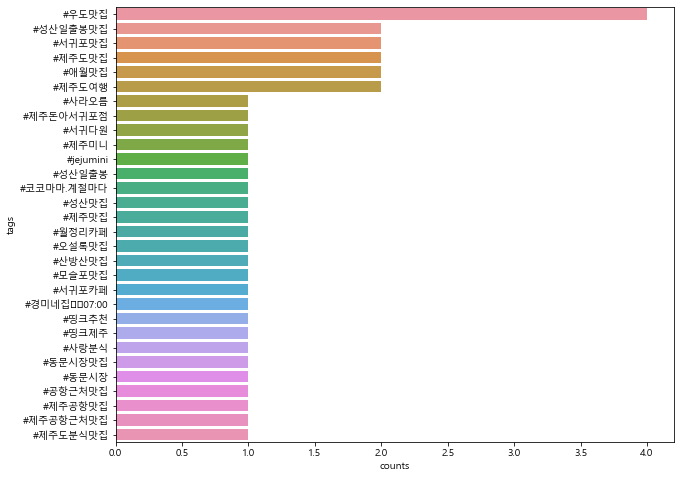

In [39]:
# 예제 4-17 막대 차트 그리기
plt.figure(figsize=(10,8)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)

### 4.2.5 워드 클라우드 그리기

In [40]:
#!pip install wordcloud

In [41]:
# 예제 4-18 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"


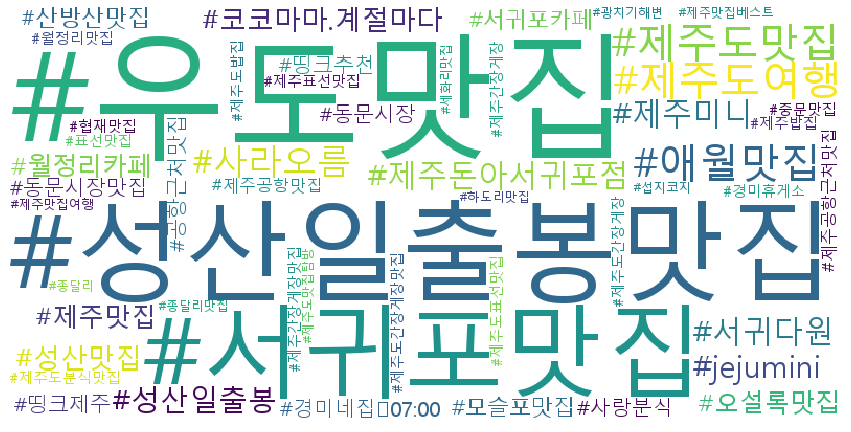

In [42]:
# 예제 4-19 워드클라우드 만들기
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/Instagram_Crawling/4_2_tag-wordcloud.png')  